# Student performance

### 1) Problem statement
This project understands how the student's test score is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

#### 2.1 Import Data and Required Packages

In [572]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [573]:
df=pd.read_csv('data/student_performance.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 3) Data set information

- Check Missing values
- Check Duplicates
- Check data type
- Check number of uniqe values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [574]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

No missing values. (In case of missing values, the rows might be dropped or imputated)

In [575]:
df.duplicated().sum()

np.int64(0)

No duplicates present. (In case of duplicates - "df.drop_duplicates()")

In [576]:
# Check null values and data types
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   str  
 1   race_ethnicity               1000 non-null   str  
 2   parental_level_of_education  1000 non-null   str  
 3   lunch                        1000 non-null   str  
 4   test_preparation_course      1000 non-null   str  
 5   math_score                   1000 non-null   int64
 6   reading_score                1000 non-null   int64
 7   writing_score                1000 non-null   int64
dtypes: int64(3), str(5)
memory usage: 62.6 KB


In [577]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'str']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'str']

print(f'Numeric features: {numeric_features}')
print(f'Categorical features: {categorical_features}')

Numeric features: ['math_score', 'reading_score', 'writing_score']
Categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


Split numeric and categorical features (categorical features are frequently of type `object`, which can be checked via `dtype == 'O'`).

In [578]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [579]:
for column_name in categorical_features:
    print(f"{column_name}: {df[column_name].unique().tolist()}\n")

gender: ['female', 'male']

race_ethnicity: ['group B', 'group C', 'group A', 'group D', 'group E']

parental_level_of_education: ["bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school', 'some high school']

lunch: ['standard', 'free/reduced']

test_preparation_course: ['none', 'completed']



### 4) Some insights

In [580]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight

- From description of numerical data, all means are very close to each other - between 66.089 and 69.169
- All standart deviations are also close  - between 14.6 and 15.2
- For math minimal score is 0, for writing it is higher - 10, and the highest minimum is for reading - 17

In [581]:
reading_full =df[df['reading_score'] == 100].shape[0]
writting_full =df[df['writing_score'] == 100].shape[0]
math_full =df[df['math_score'] == 100].shape[0]

print(f'Number of students with full reading score: {reading_full}')
print(f'Number of students with full writting score: {writting_full}')
print(f'Number of students with full math score: {math_full}')

Number of students with full reading score: 17
Number of students with full writting score: 14
Number of students with full math score: 7


In [582]:
reading_less20 =df[df['reading_score'] < 20].shape[0]
writting_less20 =df[df['writing_score'] < 20].shape[0]
math_less20 =df[df['math_score'] < 20].shape[0]

print(f'Number of students with reading score less than 20: {reading_less20}')
print(f'Number of students with writting score less than 20: {writting_less20}')
print(f'Number of students with math score less than 20: {math_less20}')

Number of students with reading score less than 20: 1
Number of students with writting score less than 20: 3
Number of students with math score less than 20: 4


Insight

- From above we see that student have performed worst in math
- Best performance is in reading

### 5) Adding "total score" and "average"

In [583]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [584]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score'] / 3
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


### Exploring Data (Visualization)

##### Average score overview

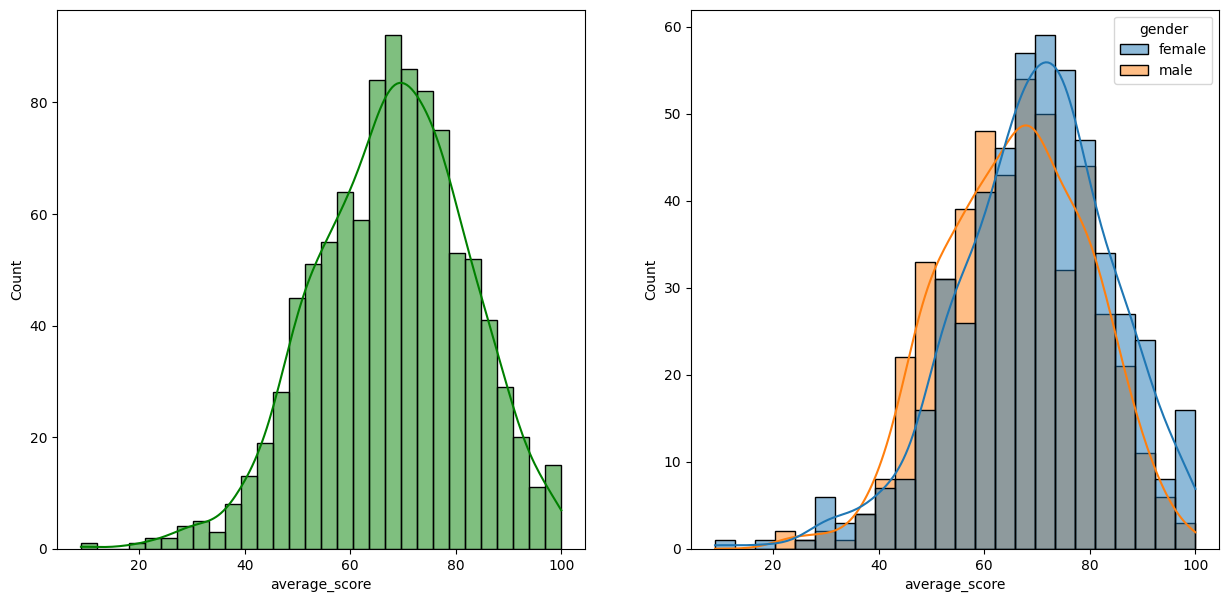

In [585]:
_, ax = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(data=df, x='average_score', bins=30, kde=True, color='green', ax=ax[0])
sns.histplot(data=df, x='average_score', kde=True, hue='gender', ax=ax[1])
plt.show()


Insight

- Female students tend to perform better

##### Maximum score distribution by subject

Text(0.5, 1.0, 'Writing Score Distribution')

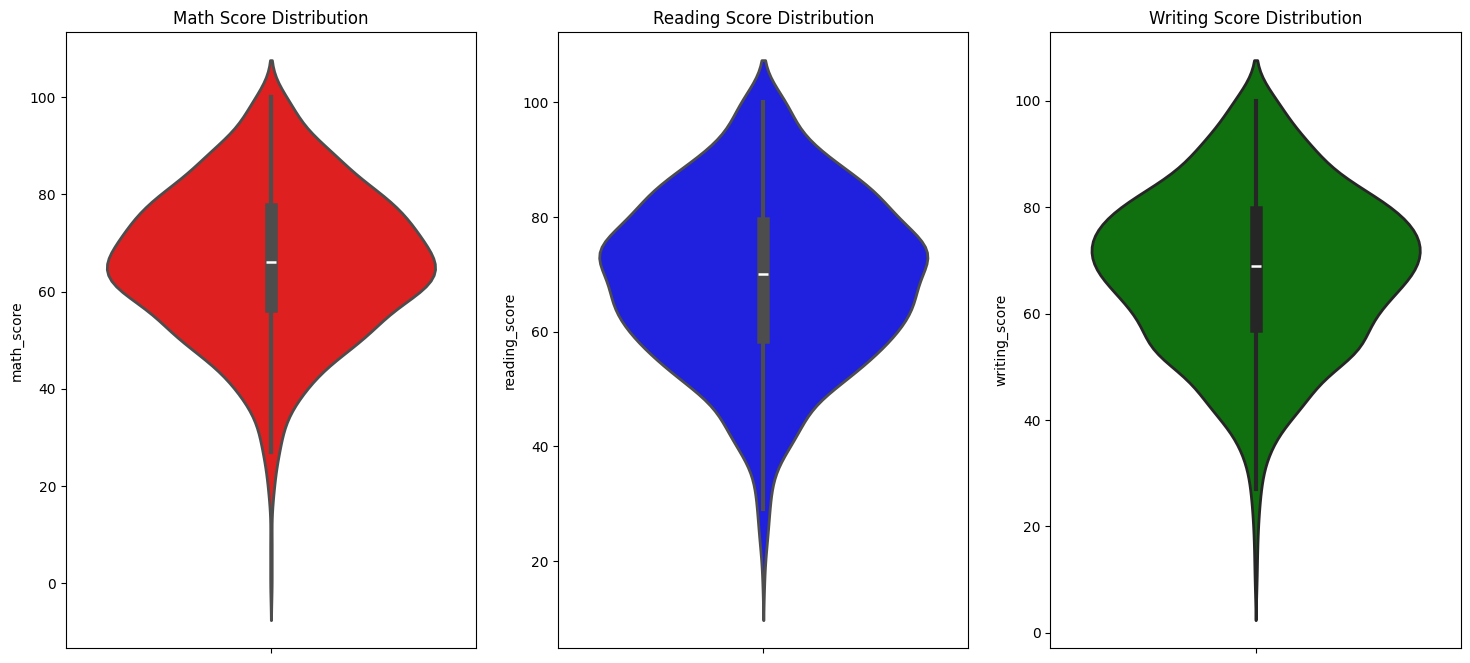

In [586]:
plt.subplots(1,3,figsize=(18, 8))
plt.subplot(131)
sns.violinplot(data=df, y='math_score', color='red', linewidth=2)
plt.title('Math Score Distribution')

plt.subplot(132)
sns.violinplot(data=df, y='reading_score', color='blue', linewidth=2)
plt.title('Reading Score Distribution')

plt.subplot(133)
sns.violinplot(data=df, y='writing_score', color='green', linewidth=2)
plt.title('Writing Score Distribution')

Insight
- From the above three plots its clearly visible that most of the students score in between 50-80

##### Distribution within categories

Text(0.5, 1.0, 'Test Preparation Course Distribution')

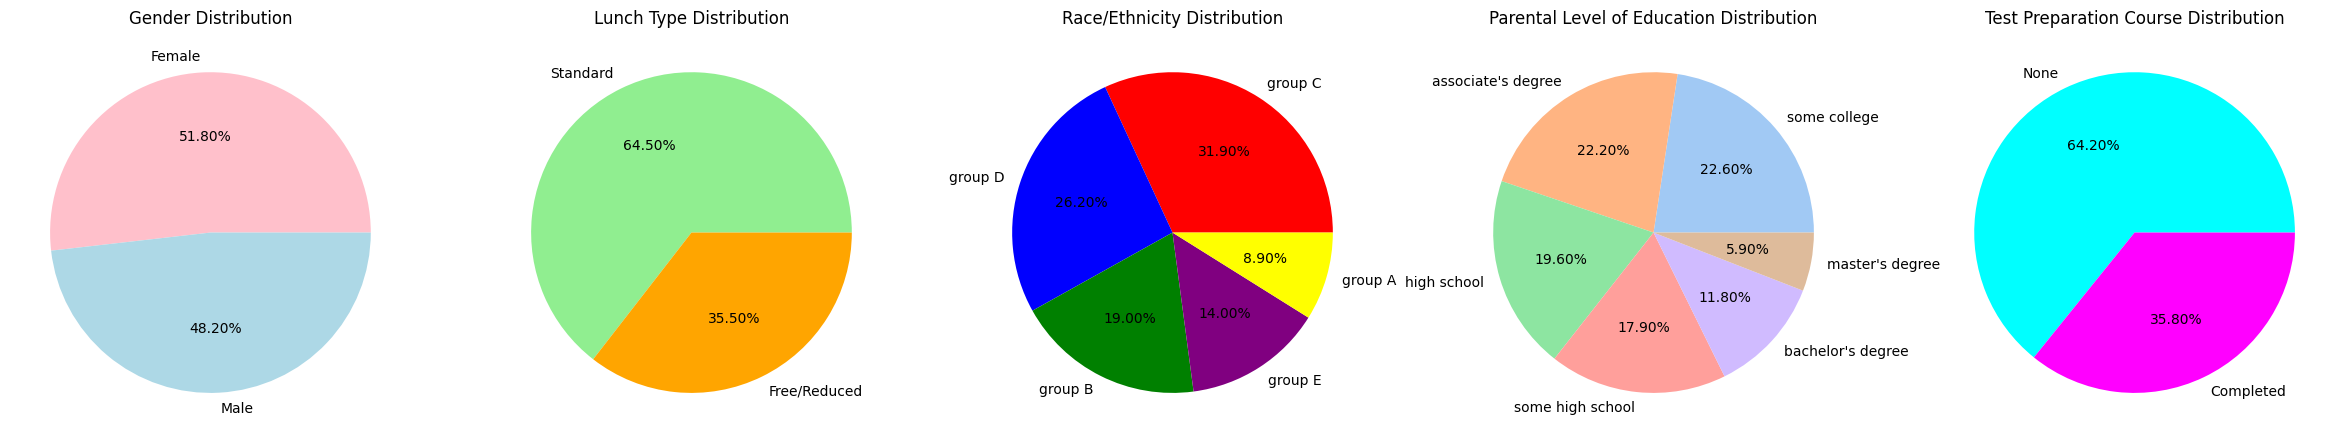

In [587]:
plt.subplots(1,5, figsize=(30,6))

plt.subplot(151)
size=df['gender'].value_counts()
labels=['Female', 'Male']
colors=['pink', 'lightblue']
plt.pie(size,labels=labels, colors=colors, autopct='%2.2f%%')
plt.title('Gender Distribution')

plt.subplot(152)
size=df['lunch'].value_counts()
labels=['Standard', 'Free/Reduced']
colors=['lightgreen', 'orange']
plt.pie(size,labels=labels, colors=colors, autopct='%2.2f%%')
plt.title('Lunch Type Distribution')

plt.subplot(153)
size=df['race_ethnicity'].value_counts()
labels=size.index
colors=['red', 'blue', 'green', 'purple', 'yellow']
plt.pie(size,labels=labels, colors=colors, autopct='%2.2f%%')
plt.title('Race/Ethnicity Distribution')

plt.subplot(154)
size=df['parental_level_of_education'].value_counts()
labels=size.index
colors=sns.color_palette('pastel')[0:6]
plt.pie(size,labels=labels, colors=colors, autopct='%2.2f%%')
plt.title('Parental Level of Education Distribution')

plt.subplot(155)
size=df['test_preparation_course'].value_counts()
labels=['None', 'Completed']
colors=['cyan', 'magenta']
plt.pie(size,labels=labels, colors=colors, autopct='%2.2f%%')
plt.title('Test Preparation Course Distribution')
        

Insight
- Number of Male and Female students is almost equal
- Number of students who have standard lunch are greater
- Number students are greatest in Group C
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"
- Number of students who have not enrolled in any test preparation course is greater
- In general we can see some features are clearly imbalanced (e.g. "Lunch type" or "Test preparation course") 

#### How different parameters influence student performance?

##### Gender

In [588]:
gender_group = df.groupby('gender')[['math_score', 'reading_score', 'writing_score', 'average_score']].mean()
gender_group

,math_score,reading_score,writing_score,average_score
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


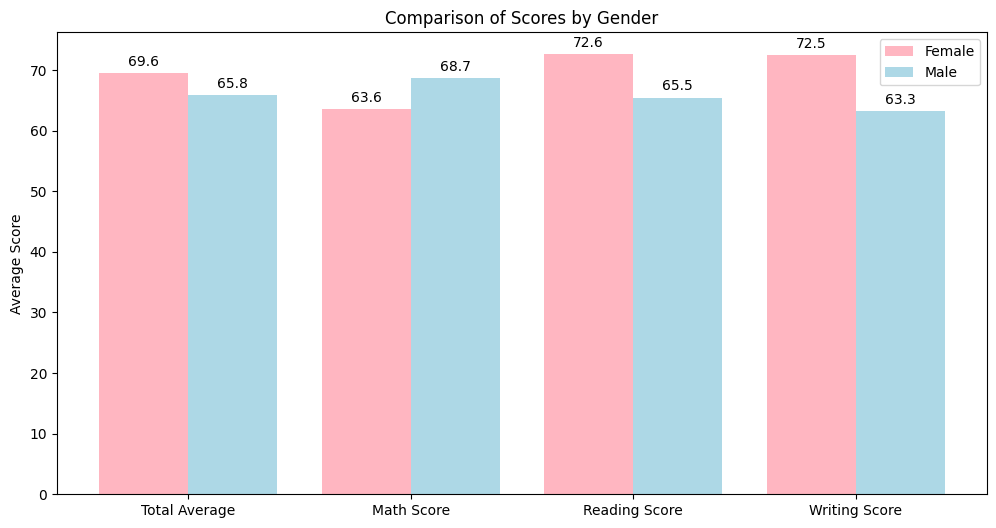

In [589]:
plt.figure(figsize=(12,6))

X=['Total Average', 'Math Score', 'Reading Score', 'Writing Score']

female_scores= [gender_group['average_score']['female'],
                 gender_group['math_score']['female'],
                 gender_group['reading_score']['female'],
                 gender_group['writing_score']['female']]
male_scores= [gender_group['average_score']['male'],
                 gender_group['math_score']['male'],
                 gender_group['reading_score']['male'],
                 gender_group['writing_score']['male']]

X_axis = np.arange(len(X))

bars_female = plt.bar(X_axis - 0.2, female_scores, 0.4, label = 'Female', color='lightpink')
bars_male = plt.bar(X_axis + 0.2, male_scores, 0.4, label = 'Male', color='lightblue')
plt.bar_label(bars_female, fmt='%.1f', padding=3)
plt.bar_label(bars_male, fmt='%.1f', padding=3)

plt.xticks(X_axis, X)
plt.ylabel("Average Score")
plt.title("Comparison of Scores by Gender")
plt.legend()
plt.show()

Insight
- On an average females have a better overall score than men.
- Female students have better avergae scrores in categories - reading and writting.
- Whereas males have scored higher in Maths.


##### Lunch

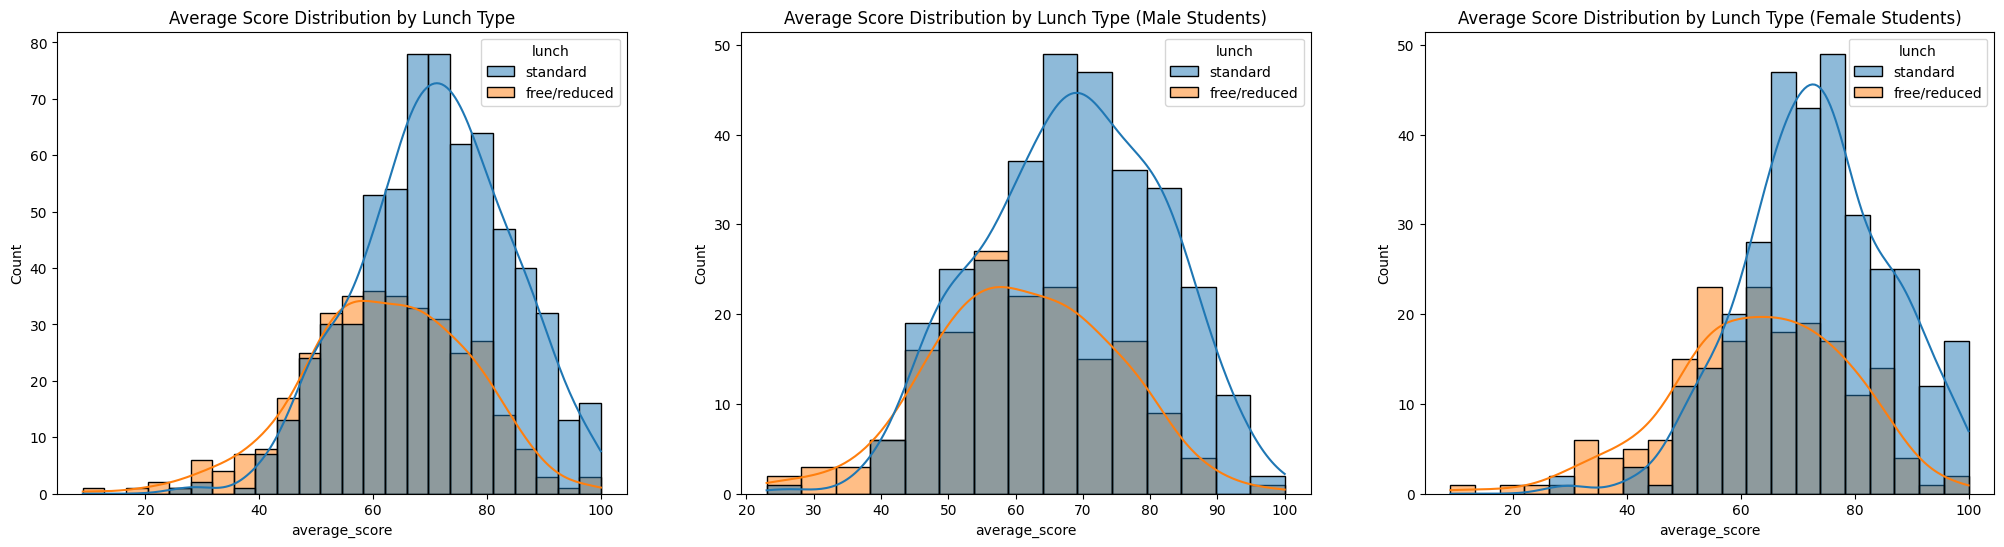

In [590]:
plt.subplots(1,3, figsize=(25,6))

plt.subplot(131)
sns.histplot(data=df, x='average_score', kde=True, hue='lunch', hue_order=['standard', 'free/reduced'])
plt.title('Average Score Distribution by Lunch Type')

plt.subplot(132)
sns.histplot(data=df[df.gender=='male'], x='average_score', kde=True, hue='lunch', hue_order=['standard', 'free/reduced'])
plt.title('Average Score Distribution by Lunch Type (Male Students)')

plt.subplot(133)
sns.histplot(data=df[df.gender=='female'], x='average_score', kde=True, hue='lunch', hue_order=['standard', 'free/reduced'])
plt.title('Average Score Distribution by Lunch Type (Female Students)')

plt.show()

Insight
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

##### Race/Group

In [591]:
Group_data=df.groupby('race_ethnicity')[['math_score', 'reading_score', 'writing_score']].mean()
Group_data

,math_score,reading_score,writing_score
race_ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


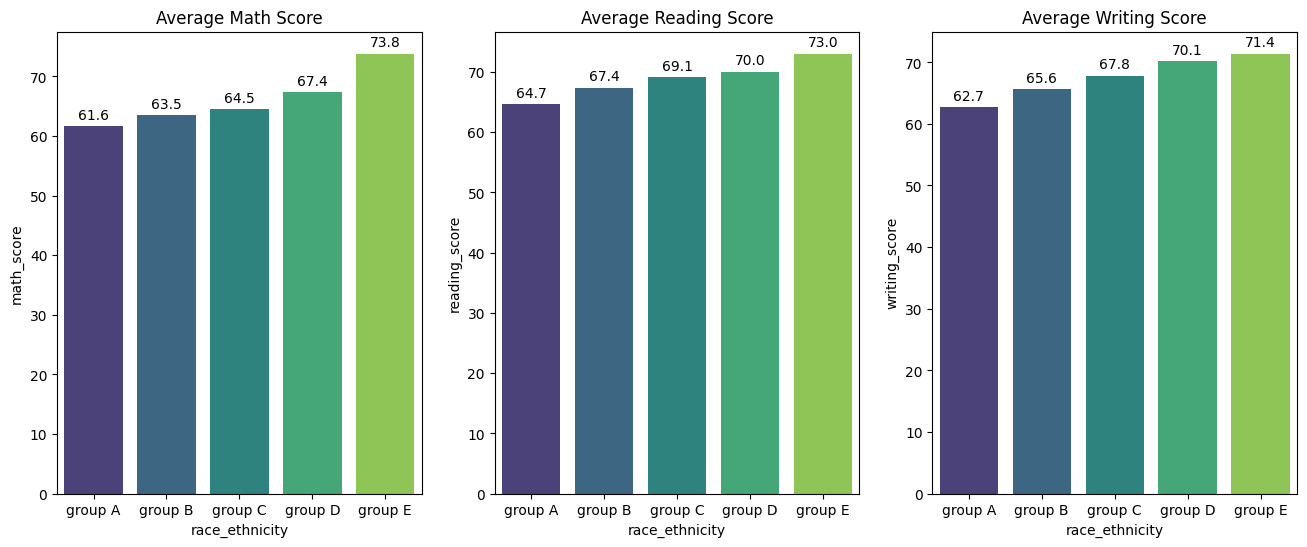

In [592]:
_,ax = plt.subplots(1,3, figsize=(16,6))

sns.barplot(x=Group_data.index, y=Group_data['math_score'], palette='viridis', ax=ax[0])
ax[0].set_title('Average Math Score')

for container in ax[0].containers:
    ax[0].bar_label(container, fmt='%.1f', padding=3)

sns.barplot(x=Group_data.index, y=Group_data['reading_score'], palette='viridis', ax=ax[1])
ax[1].set_title('Average Reading Score')

for container in ax[1].containers:
    ax[1].bar_label(container, fmt='%.1f', padding=3)

sns.barplot(x=Group_data.index, y=Group_data['writing_score'], palette='viridis', ax=ax[2])
ax[2].set_title('Average Writing Score')

for container in ax[2].containers:
    ax[2].bar_label(container, fmt='%.1f', padding=3)

Insight
- Group performance is stable across all subjects.
- Group E students scored the highest marks in all subjects.
- Group A students scored the lowest marks in all subjects.

##### Parental level of education

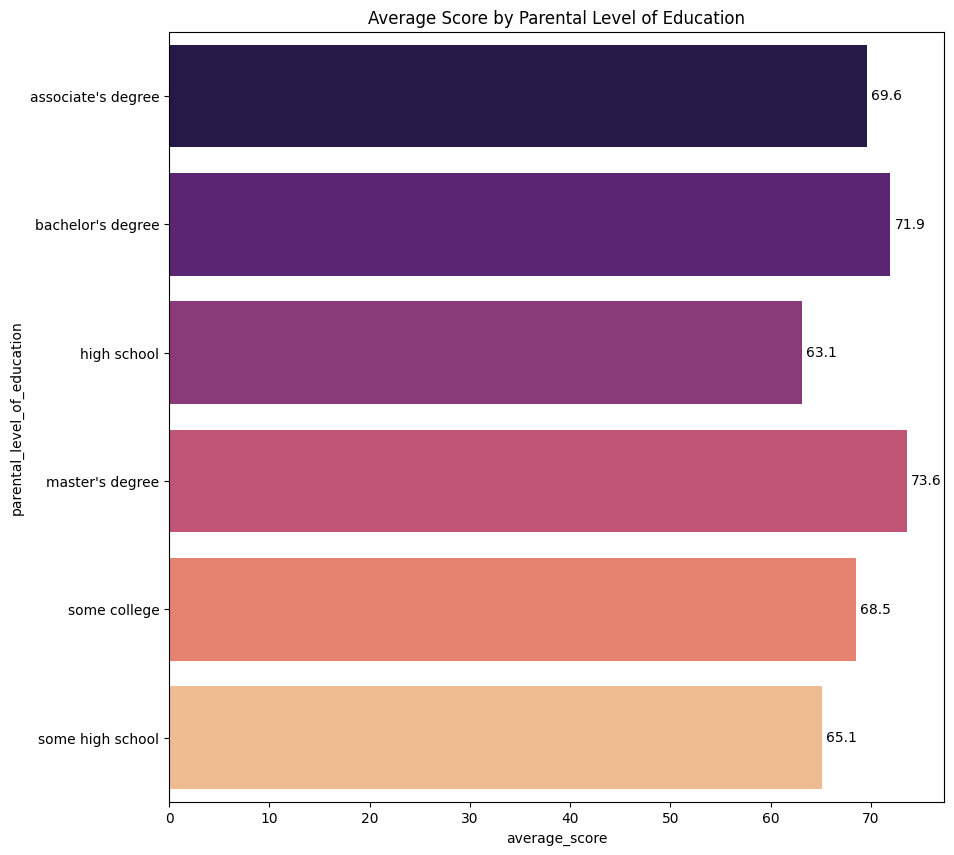

In [593]:
edu_data=df.groupby('parental_level_of_education')[['average_score']].mean()

plt.figure(figsize=(10,10))
sns.barplot(y=edu_data.index, x=edu_data['average_score'], palette='magma', orient='h')
plt.title('Average Score by Parental Level of Education')

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.1f', padding=3)

plt.show()

Insight
- The score of student whose parents have master and bachelor level education are higher than others.

##### Preparation Course

In [594]:
prep_data = df.groupby('test_preparation_course')[['math_score', 'reading_score', 'writing_score', 'average_score']].mean()
completed_scores = [prep_data['math_score']['completed'],
                    prep_data['reading_score']['completed'],
                    prep_data['writing_score']['completed'],
                    prep_data['average_score']['completed']]
none_scores = [prep_data['math_score']['none'],
               prep_data['reading_score']['none'],
               prep_data['writing_score']['none'],
               prep_data['average_score']['none']]

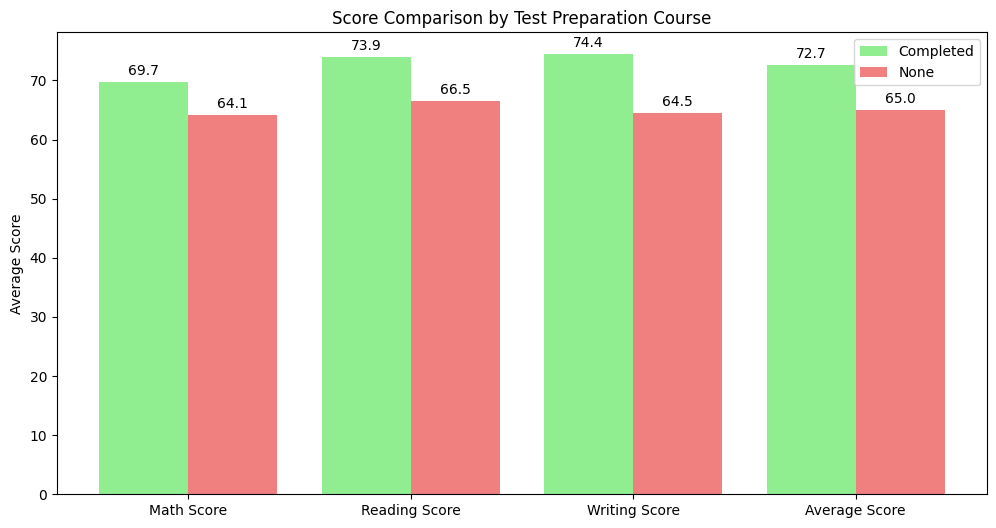

In [595]:
plt.figure(figsize=(12, 6))

X = ['Math Score', 'Reading Score', 'Writing Score', 'Average Score']

X_axis = np.arange(len(X))

bars_completed = plt.bar(X_axis - 0.2, completed_scores, 0.4, label='Completed', color='lightgreen')
bars_none = plt.bar(X_axis + 0.2, none_scores, 0.4, label='None', color='lightcoral')
plt.bar_label(bars_completed, fmt='%.1f', padding=3)
plt.bar_label(bars_none, fmt='%.1f', padding=3)

plt.xticks(X_axis, X)
plt.ylabel('Average Score')
plt.title('Score Comparison by Test Preparation Course')
plt.legend()
plt.show()


Insight

- Students who have completed the Test Prepration Course have higher scores in all categories than those who haven't taken the course

##### Analysis using pairplot

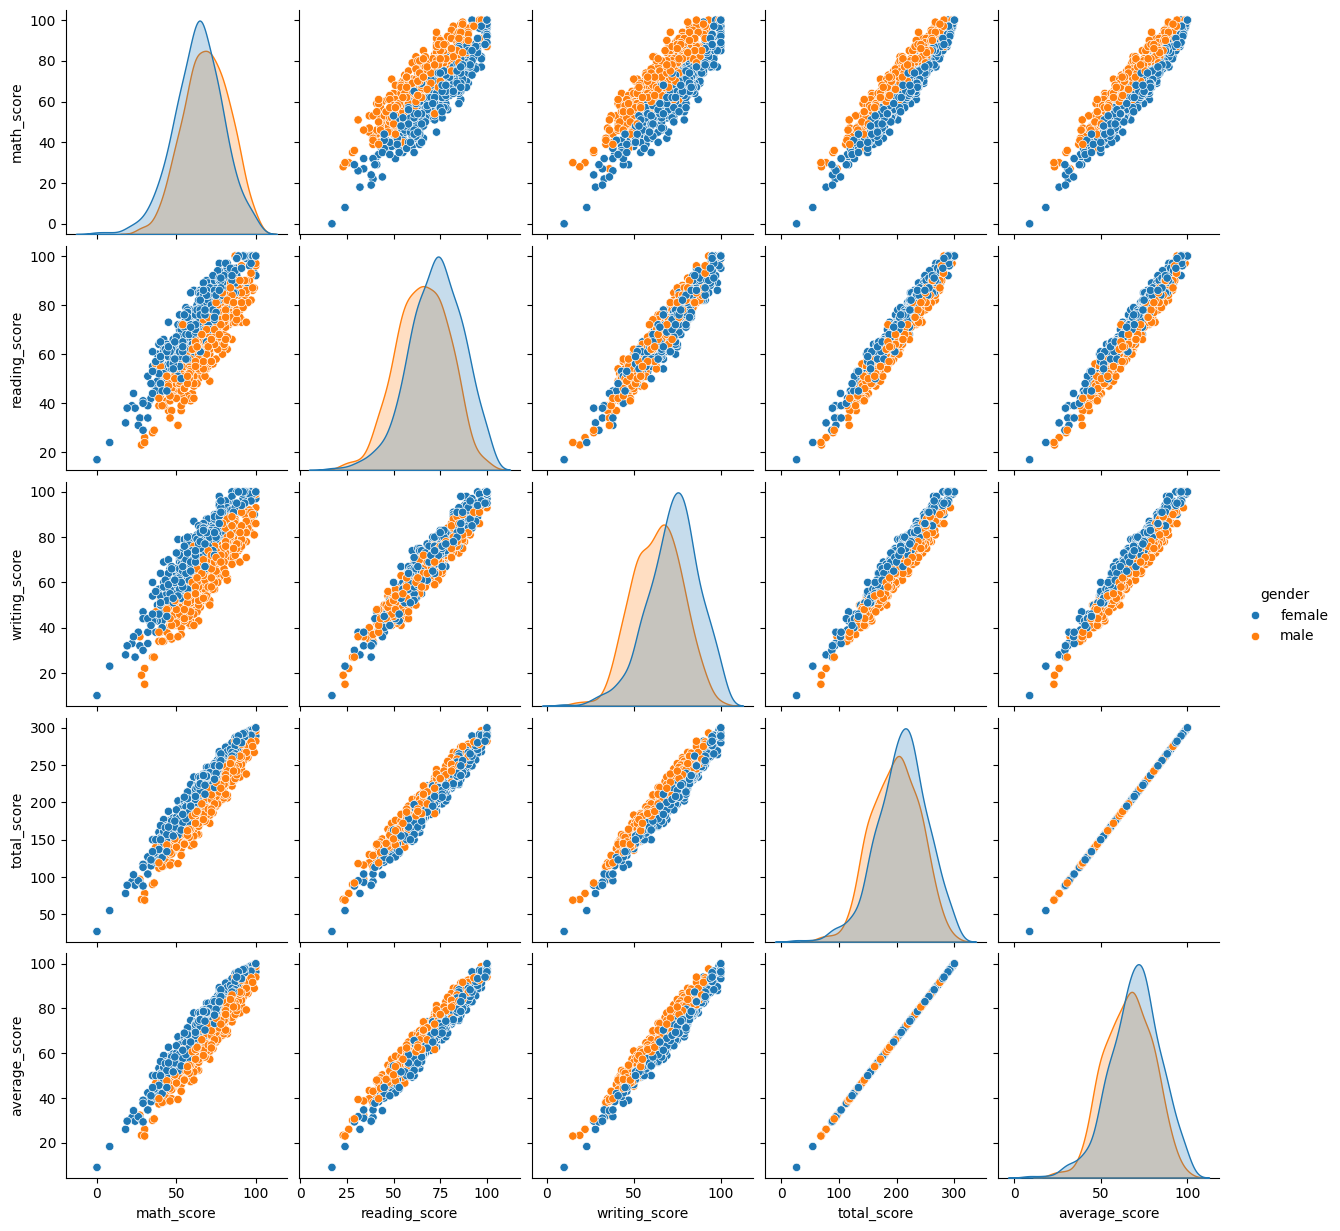

In [596]:
sns.pairplot(df,hue = 'gender')
plt.show()

Insight
- From the above plot it is clear that all the scores increase linearly with each other.

### Conclusion
- Female students consistently outperform males in reading and writing, while males score slightly higher in math
- Students with standard lunch and those who completed test preparation courses show significantly better performance across all subjects
- Parental education level correlates with student performance, with master's and bachelor's degree holders' children scoring highest
- Race/ethnicity group E achieves the highest scores across all subjects, while group A shows the lowest performance
